In [13]:
import numpy as np
import pandas as pd
from datetime import datetime

In [5]:
whole = pd.read_table("/DAS_Storage1/aschoi/data/Drug_Repositioning/8_new_training/PREDICT_data/2_1_gold_descriptor_combined.tsv")

In [7]:
tn_local = pd.read_table("/DAS_Storage1/aschoi/data/Drug_Repositioning/8_new_training/PREDICT_data/3_2_tn_local_descriptor.tsv")

In [6]:
tn_local_b = pd.read_table("/DAS_Storage1/aschoi/data/Drug_Repositioning/8_new_training/PREDICT_data/4_2_tn_local_descriptor_bayesian.tsv")

In [8]:
print len(whole)
whole.head(1)

103146


,drug_id,disease_id,association,C0000727,C0000731,C0000737,C0000768,C0000772,C0000786,C0000814,...,387585,388165,55219,55973,65264,80350,84624,84722,91851,406216
0,DB00659,103780,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
print len(tn_local)
print len(tn_local_b)
tn_local_b.head(1)

14249
12364


,drug_id,disease_id,association,C0000727,C0000731,C0000737,C0000768,C0000772,C0000786,C0000814,...,387585,388165,55219,55973,65264,80350,84624,84722,91851,406216
0,DB01156,157300,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
whole['flag'] = 0

In [16]:
# whole negative에 포함되어 있는 tn_local 제거
cnt = 0
print len(tn_local)
print "start : %d : " % cnt + datetime.now().strftime('%Y-%m-%d %H:%M:%S')
for index, row in tn_local.iterrows():
    dr_id = row['drug_id']
    di_id = row['disease_id']
    found = whole[(whole.drug_id == dr_id) & (whole.disease_id == di_id)]
    if found.empty:
        continue
    else:
        whole.loc[found.index, 'flag'] = 2
    cnt = cnt +1
    if cnt % 1000 == 0:
        print "%d : " % cnt + datetime.now().strftime('%Y-%m-%d %H:%M:%S')
print "end : %d : " % cnt + datetime.now().strftime('%Y-%m-%d %H:%M:%S')

14249
start : 0 : 2017-03-30 10:13:14
1000 : 2017-03-30 10:13:27
2000 : 2017-03-30 10:13:38
3000 : 2017-03-30 10:13:50
4000 : 2017-03-30 10:14:01
5000 : 2017-03-30 10:14:12
6000 : 2017-03-30 10:14:24
7000 : 2017-03-30 10:14:35
8000 : 2017-03-30 10:14:47
9000 : 2017-03-30 10:14:58
10000 : 2017-03-30 10:15:09
11000 : 2017-03-30 10:15:21
12000 : 2017-03-30 10:15:32
13000 : 2017-03-30 10:15:44
14000 : 2017-03-30 10:15:55
end : 14249 : 2017-03-30 10:15:58


In [20]:
print len(whole)
print len(whole[whole.flag == 2])
print len(tn_local)
print len(whole[whole.flag !=2])

103146
14249
14249
88897


In [29]:
neg = whole[whole.flag != 2]

In [30]:
neg = neg[neg.columns.values[:-1].tolist()]

In [38]:
neg.index = range(len(neg))

In [46]:
neg.to_csv("/DAS_Storage1/aschoi/data/Drug_Repositioning/8_new_training/PREDICT_data/3_2_2_noTN_local_descriptor_predict.tsv", index=False, sep='\t')

In [39]:
print len(neg)
neg.head(1)

88897


,drug_id,disease_id,association,C0000727,C0000731,C0000737,C0000768,C0000772,C0000786,C0000814,...,387585,388165,55219,55973,65264,80350,84624,84722,91851,406216
0,DB00659,608622,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
import random
idx = random.sample(xrange(0, len(neg)), 12887)

In [52]:
filtered = neg.filter(items = idx, axis=0)

In [53]:
print len(idx), len(filtered)

12887 12887


In [54]:
noise_tn_local = pd.concat([tn_local,filtered])

In [55]:
print len(tn_local), len(filtered), len(noise_tn_local), len(tn_local[tn_local.association ==1]), len(tn_local[tn_local.association ==0])
print tn_local.shape, filtered.shape, noise_tn_local.shape

14249 12887 27136 1362 12887
(14249, 5368) (12887, 5368) (27136, 5368)


In [56]:
noise_tn_local.to_csv("/DAS_Storage1/aschoi/data/Drug_Repositioning/8_new_training/PREDICT_data/3_3_2_tn_local_noise_descriptor_predict.tsv"
                     , index = False, sep='\t')

In [60]:
# tn negative에 포함되어 있는 tn_bayesian 제거
cnt = 0
print len(tn_local)
tn_local['flag']=0
print "start : %d : " % cnt + datetime.now().strftime('%Y-%m-%d %H:%M:%S')
for index, row in tn_local_b.iterrows():
    dr_id = row['drug_id']
    di_id = row['disease_id']
    found = tn_local[(tn_local.drug_id == dr_id) & (tn_local.disease_id == di_id)]
    if found.empty:
        continue
    else:
        tn_local.loc[found.index, 'flag'] = 2
    cnt = cnt +1
    if cnt % 1000 == 0:
        print "%d : " % cnt + datetime.now().strftime('%Y-%m-%d %H:%M:%S')
print "end : %d : " % cnt + datetime.now().strftime('%Y-%m-%d %H:%M:%S')

14249
start : 0 : 2017-03-30 20:38:11
1000 : 2017-03-30 20:38:19
2000 : 2017-03-30 20:38:25
3000 : 2017-03-30 20:38:31
4000 : 2017-03-30 20:38:37
5000 : 2017-03-30 20:38:44
6000 : 2017-03-30 20:38:50
7000 : 2017-03-30 20:38:56
8000 : 2017-03-30 20:39:02
9000 : 2017-03-30 20:39:09
10000 : 2017-03-30 20:39:15
11000 : 2017-03-30 20:39:21
12000 : 2017-03-30 20:39:27
end : 12364 : 2017-03-30 20:39:30


In [61]:
print len(tn_local)
print len(tn_local[tn_local.flag == 2])
print len(tn_local_b)
print len(tn_local[tn_local.flag !=2])

14249
12364
12364
1885


In [ ]:
no_tn_local_b = 

In [64]:
dist = pd.read_table("/DAS_Storage1/aschoi/data/Drug_Repositioning/7_new_association/PREDICT_data/4_2_drug_disease_norm_distance_predict.tsv", index_col=0)

In [65]:
dist

,DB00659,DB01193,DB00316,DB00819,DB00787,DB00210,DB00640,DB00240,DB00630,DB00346,...,DB00162,DB00126,DB02546,DB00682,DB00549,DB00744,DB00246,DB00399,DB00315,DB00909
103780,3.720862e-02,3.056801e-03,1.473250e-04,3.755225e-04,8.054213e-03,6.101521e-03,4.957054e-03,4.912960e-03,1.647338e-04,7.685395e-03,...,1.815887e-03,6.734649e-04,5.603388e-03,9.806045e-05,7.255865e-03,1.974490e-03,2.429467e-03,1.333368e-04,5.461664e-03,1.365937e-07
608622,2.864645e-24,1.725372e-22,1.963140e-24,2.188575e-24,3.700806e-22,1.043736e-23,4.746401e-25,4.008725e-25,1.129857e-23,9.589852e-23,...,1.392582e-25,4.976669e-26,2.854018e-24,1.052402e-26,7.129165e-23,2.727317e-25,5.397899e-24,4.818538e-20,2.525793e-24,2.042602e-28
161900,1.374133e-29,2.509495e-27,2.918914e-29,2.012054e-29,6.732195e-27,7.406145e-29,1.719192e-30,1.126533e-30,2.188901e-28,1.334524e-27,...,3.822250e-31,1.350140e-31,1.581475e-29,3.662145e-32,9.835241e-28,1.014200e-30,5.213433e-29,7.395654e-24,1.549818e-29,1.243693e-33
145590,1.254547e-09,1.919270e-09,4.632248e-10,1.631383e-10,6.520346e-09,1.873183e-09,7.342265e-10,6.245017e-10,1.408084e-10,4.884340e-09,...,2.207381e-10,8.149483e-11,1.241112e-09,1.322690e-11,3.726908e-09,2.978529e-10,8.908682e-10,1.632241e-09,1.242972e-09,3.409208e-14
147530,4.128979e-23,3.732717e-22,6.497406e-23,2.266841e-23,2.238744e-21,9.796430e-23,8.071776e-24,8.008657e-24,3.750129e-23,3.976163e-21,...,2.735889e-24,9.825898e-25,4.018845e-23,1.627052e-25,3.944048e-22,4.356695e-24,4.096630e-23,6.064908e-20,2.210514e-23,1.846832e-27
157300,2.208939e-11,3.323869e-11,7.661712e-12,2.985517e-12,1.275368e-10,2.861205e-11,1.008411e-11,1.110318e-11,2.289254e-12,7.361476e-11,...,3.948453e-12,1.421201e-12,2.060865e-11,2.014833e-13,5.510725e-11,4.489237e-12,1.042284e-11,3.831839e-11,7.816225e-11,5.926228e-16
608088,3.544363e-06,3.929580e-06,1.010550e-06,3.540344e-07,1.290625e-05,4.926298e-06,2.385737e-06,2.105432e-06,2.555638e-07,9.780460e-06,...,7.572005e-07,2.786376e-07,3.832348e-06,4.623957e-08,8.568468e-06,1.013005e-06,2.354609e-06,8.306798e-07,3.846424e-06,8.450496e-11
140600,2.162221e-09,2.412052e-09,6.308079e-10,2.626776e-10,8.540622e-09,2.675974e-09,1.185656e-09,1.170022e-09,1.584188e-10,5.518316e-09,...,4.299361e-10,1.607913e-10,1.853639e-09,2.174408e-11,4.432466e-09,4.919866e-10,1.107582e-09,1.506556e-09,1.407067e-09,7.282684e-14
147480,1.617774e-01,6.964371e-02,3.265751e-03,5.223501e-02,1.701548e-01,1.643505e-01,1.567725e-01,1.560535e-01,3.406598e-03,1.739439e-01,...,5.734068e-02,2.111844e-02,1.598632e-01,2.986853e-03,1.744158e-01,6.188371e-02,6.570095e-02,1.471573e-03,1.625523e-01,3.436869e-06
600351,1.161447e-06,1.067323e-06,4.535104e-08,6.313743e-07,3.274137e-06,1.539063e-06,8.137892e-07,7.614942e-07,6.724725e-08,2.638856e-06,...,2.763509e-07,1.018397e-07,1.121859e-06,1.495230e-08,2.303387e-06,3.345488e-07,6.634274e-07,2.148740e-07,1.130817e-06,3.112410e-11


In [85]:
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [75]:
val =list()
for index, row in dist.iterrows():
    for r in row:
        val.append(r)

In [86]:
h = sorted(val)

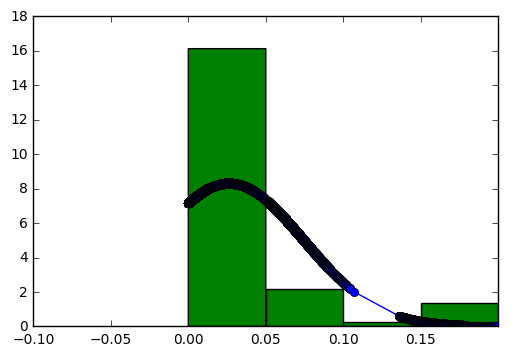

In [96]:
fit = stats.norm.pdf(h, np.mean(h), np.std(h))

plt.plot(h, fit, '-o')
plt.hist(h, normed=True, bins =20)
plt.xlim(-0.1, 0.2)
plt.show()

In [97]:
print np.mean(h)
print np.std(h)
print min(h)
print max(h)

0.0260919894535
0.0479671953905
3.59807812731e-36
1.0


In [93]:
help(plt.hist)

Help on function hist in module matplotlib.pyplot:

hist(x, bins=10, range=None, normed=False, weights=None, cumulative=False, bottom=None, histtype=u'bar', align=u'mid', orientation=u'vertical', rwidth=None, log=False, color=None, label=None, stacked=False, hold=None, data=None, **kwargs)
    Plot a histogram.
    
    Compute and draw the histogram of *x*. The return value is a
    tuple (*n*, *bins*, *patches*) or ([*n0*, *n1*, ...], *bins*,
    [*patches0*, *patches1*,...]) if the input contains multiple
    data.
    
    Multiple data can be provided via *x* as a list of datasets
    of potentially different length ([*x0*, *x1*, ...]), or as
    a 2-D ndarray in which each column is a dataset.  Note that
    the ndarray form is transposed relative to the list form.
    
    Masked arrays are not supported at present.
    
    Parameters
    ----------
    x : (n,) array or sequence of (n,) arrays
        Input values, this takes either a single array or a sequency of
        arra

In [70]:
help(plt.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=20, c=None, marker=u'o', cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, hold=None, data=None, **kwargs)
    Make a scatter plot of x vs y, where x and y are sequence like objects
    of the same length.
    
    Parameters
    ----------
    x, y : array_like, shape (n, )
        Input data
    
    s : scalar or array_like, shape (n, ), optional, default: 20
        size in points^2.
    
    c : color, sequence, or sequence of color, optional, default: 'b'
        `c` can be a single color format string, or a sequence of color
        specifications of length `N`, or a sequence of `N` numbers to be
        mapped to colors using the `cmap` and `norm` specified via kwargs
        (see below). Note that `c` should not be a single numeric RGB or
        RGBA sequence because that is indistinguishable from an array of
        values to be colormapped.  `c` can be 